**End to End Project - Estimate wine quality**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

Task: Estimate wine quality Estimate wine quality.

Input data available:
1. Wine quality database (Location: /cxldata/datasets/project/wine_quality_red.csv)
  * fixed acidity
  * volatile acidity
  * citric acid
  * residual sugar
  * chlorides
  * free sulfur dioxide
  * total sulfur dioxide
  * density
  * pH
  * sulphates
  * alcohol
  * quality (score between 0 and 10) – dependent variable.

Suggestions:
1. Divide the dataset into training and test dataset in the ratio 75:25 choosing random or stratified

Please use the forum below to discuss the problem and post queries.

Data source Acknowledgement: This dataset is taken from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality

# Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import sklearn.model_selection as model_selection

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
#%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
WINE_QUALITY_PATH = os.path.join("/cxldata", "datasets", "project")

def load_housing_data(housing_path=WINE_QUALITY_PATH):
    csv_path = os.path.join(housing_path, "wine_quality_red.csv")
    return pd.read_csv(csv_path)

wine_quality =  load_housing_data()
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_quality["quality"].value_counts() # discrete --> classification

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


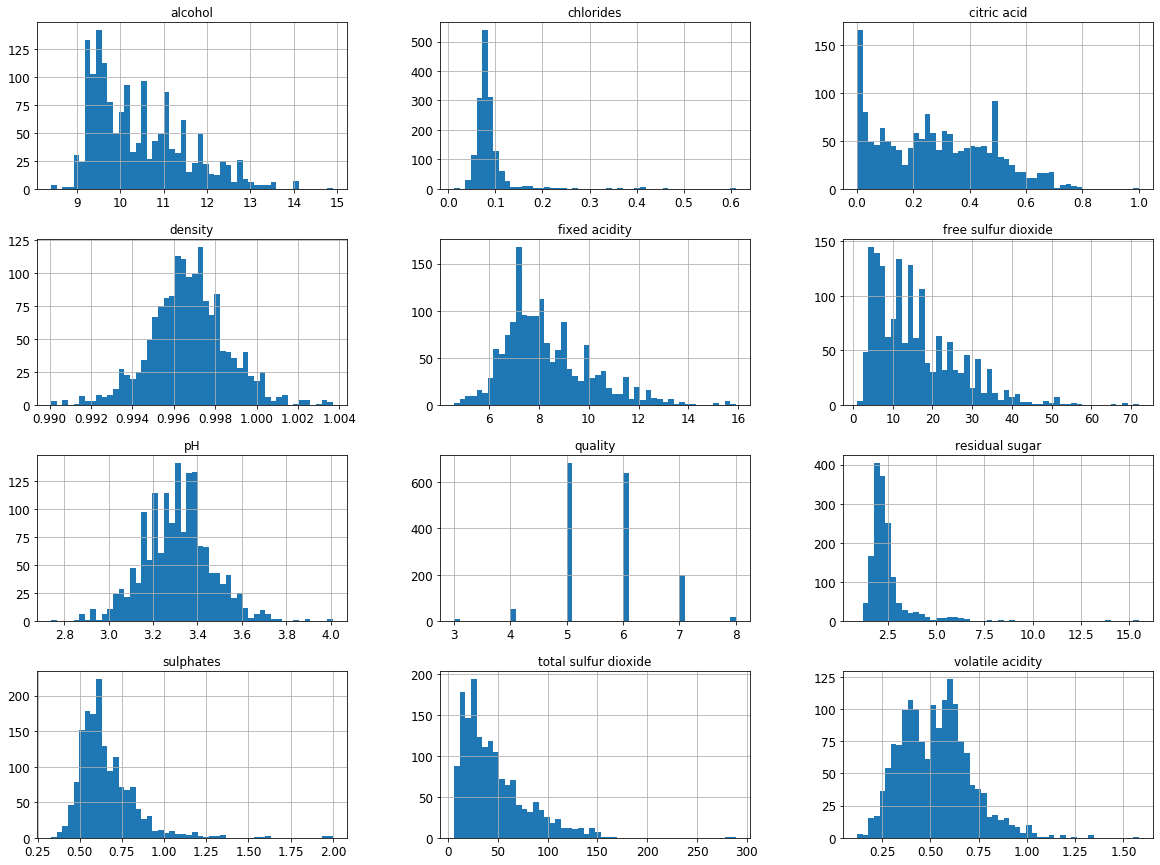

In [14]:
wine_quality.hist(bins=50, figsize=(20,15))
plt.show()

density, pH: unimodal

volatile acidity: bimodal

In [7]:
wine_quality.skew() 

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

chlorides, residual sugar, sulphates, total sulfur dioxide, free sulfur dioxide: right skewed

pH, density: symmetric

In [8]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [9]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [73]:
#train_set, test_set = split_train_test(wine_quality, 0.25)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine_quality, test_size=0.25, random_state=42)
len(train_set)

1199

In [11]:
len(test_set)

399

Let's now change the bins for some of the features:

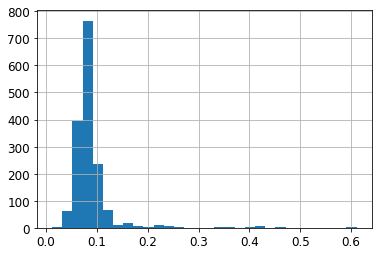

In [20]:
wine_quality["chlorides"].hist(bins=30)

3    502
2    464
1    410
4    223
Name: chlorides_cat, dtype: int64


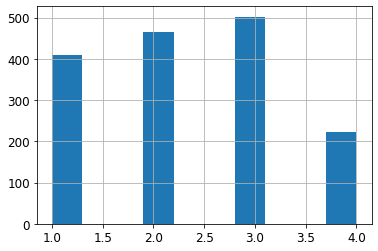

In [37]:
wine_quality["chlorides_cat"] = pd.cut(wine_quality["chlorides"],
                               bins=[0., 0.07, 0.08, 0.10, np.inf],
                               labels=[1, 2, 3, 4])
print(wine_quality["chlorides_cat"].value_counts())
wine_quality["chlorides_cat"].hist()

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wine_quality, wine_quality["chlorides_cat"]):
    strat_train_set = wine_quality.loc[train_index]
    strat_test_set = wine_quality.loc[test_index]

In [67]:
strat_test_set["chlorides_cat"].value_counts() / len(strat_test_set)

3    0.312500
2    0.290625
1    0.256250
4    0.140625
Name: chlorides_cat, dtype: float64

In [69]:
wine_quality["chlorides_cat"].value_counts() / len(wine_quality)

3    0.313946
2    0.290181
1    0.256410
4    0.139462
Name: chlorides_cat, dtype: float64

In [74]:
def chlorides_cat_proportions(data):
    return data["chlorides_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(wine_quality, test_size=0.25, random_state=42)

compare_props = pd.DataFrame({
    "Overall": chlorides_cat_proportions(wine_quality),
    "Stratified": chlorides_cat_proportions(strat_test_set),
    "Random": chlorides_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [75]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.256410,0.256250,0.2725,6.275000,-0.062500
2,0.290181,0.290625,0.2850,-1.785560,0.152883
3,0.313946,0.312500,0.3250,3.520916,-0.460657
4,0.139462,0.140625,0.1175,-15.747758,0.833800


In [76]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("chlorides_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [40]:
# How the variation of a feature affects other features (correlation)
corr_matrix = wine_quality.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

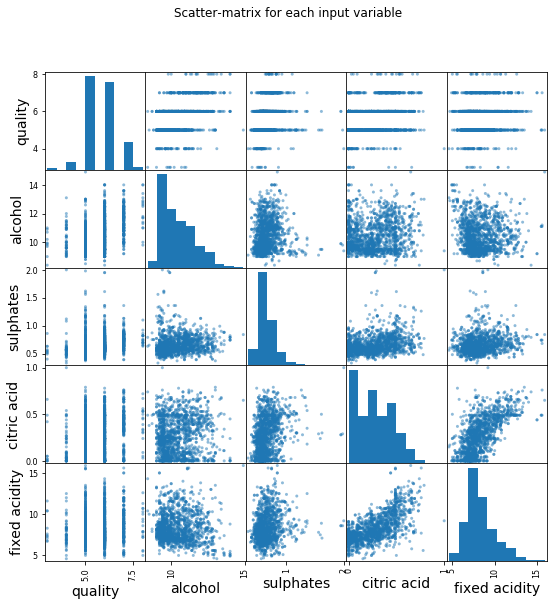

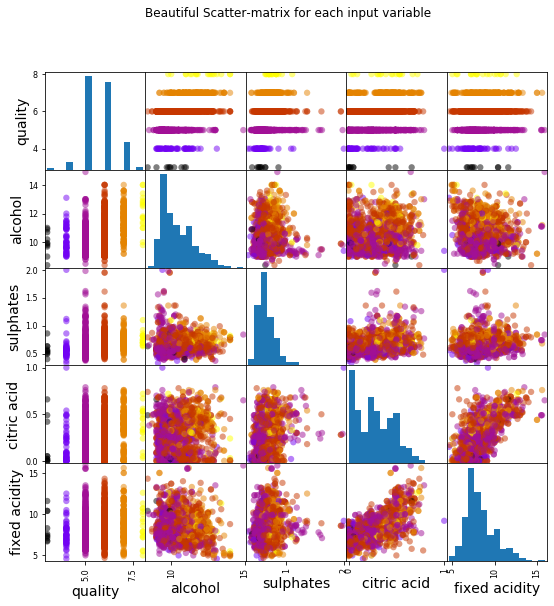

In [65]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ["quality","alcohol", "sulphates",
              "citric acid", "fixed acidity"]
scatter_matrix(wine_quality[feature_names], figsize=(9, 9))
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('wine_scatter_matrix')

X = wine_quality[feature_names]
y = wine_quality['quality']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Beautiful Scatter-matrix for each input variable')
plt.savefig('wine_beautiful_scatter_matrix')

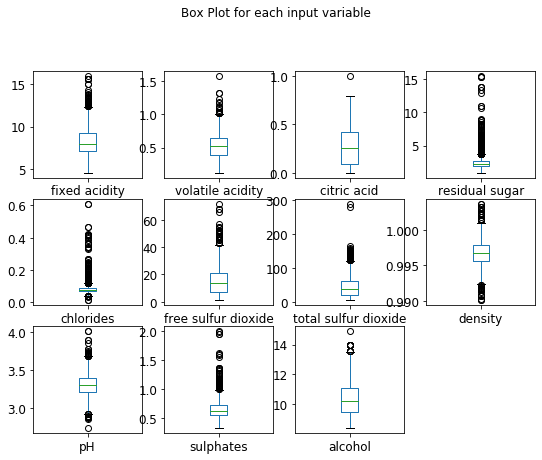

In [55]:
wine_quality.drop("quality", axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('wine_box'plt.show()

# Prepare the data for Machine Learning algorithms

In [82]:
# separate the predictors and target variable
X_train = strat_train_set.drop("quality", axis=1) # drop labels for training set
y_train = strat_train_set["quality"].copy()

# separate the predictors and target variable
X_test = strat_test_set.drop("quality", axis=1) # drop labels for training set
y_test = strat_test_set["quality"].copy()

In [81]:
# Data Cleaning
# missing values
sample_incomplete_rows = X_train[X_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


In [83]:
# Data Cleaning
# missing values
sample_incomplete_rows = X_test[X_test.isnull().any(axis=1)].head()
sample_incomplete_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


In [124]:
# building a pipeline of transformation steps for numerical values
# in this case we just apply scaling

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

full_pipeline = Pipeline([
        ('std_scaler', MinMaxScaler()),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [125]:
X_train_prepared

array([[0.49557522, 0.19178082, 0.4       , ..., 0.50393701, 0.31736527,
        0.32307692],
       [0.2300885 , 0.28767123, 0.27      , ..., 0.51181102, 0.22754491,
        0.4       ],
       [0.43362832, 0.32191781, 0.44      , ..., 0.56692913, 0.17964072,
        0.16923077],
       ...,
       [0.17699115, 0.41438356, 0.09      , ..., 0.48031496, 0.09580838,
        0.36923077],
       [0.46902655, 0.34931507, 0.24      , ..., 0.27559055, 0.14371257,
        0.15384615],
       [0.05309735, 0.1369863 , 0.25      , ..., 0.50393701, 0.13173653,
        0.12307692]])

In [126]:
X_train_prepared.shape

(1279, 11)

In [127]:
X_test_prepared

array([[0.23893805, 0.15753425, 0.24      , ..., 0.54330709, 0.1257485 ,
        0.24615385],
       [0.14159292, 0.30136986, 0.09      , ..., 0.62992126, 0.16167665,
        0.44615385],
       [0.61946903, 0.19863014, 0.54      , ..., 0.22047244, 0.25748503,
        0.23076923],
       ...,
       [0.03539823, 0.63013699, 0.24      , ..., 0.78740157, 0.17365269,
        0.47692308],
       [0.2920354 , 0.44178082, 0.        , ..., 0.46456693, 0.20958084,
        0.38461538],
       [0.32743363, 0.30136986, 0.22      , ..., 0.49606299, 0.17365269,
        0.16923077]])

In [128]:
X_test_prepared.shape

(320, 11)

# Select and train a model 

In [129]:
# train a logistic regression model: see https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_prepared, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train_prepared, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test_prepared, y_test)))

Accuracy of Logistic regression classifier on training set: 0.59
Accuracy of Logistic regression classifier on test set: 0.60


In [130]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
# let's try the full preprocessing pipeline on a few training instances
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [6.04298719 5.66242232 5.15667738 6.89562319 5.26210088]


Compare against the actual values:

In [132]:
print("Labels:", list(some_labels))

Labels: [6, 5, 5, 7, 5]


In [133]:
# performance evaluation of LR model on training partition
# metric: RMSE
from sklearn.metrics import mean_squared_error

X_train_predictions = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, X_train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6541123910433888

In [134]:
#metric: Mean Absolut Error (MAE)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, X_train_predictions)
lin_mae

0.5079289168219303

In [135]:
# train a decision tree model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [136]:
# performance evaluation of DT model on trianing partition
# metric: RMSE
X_train_predictions = tree_reg.predict(X_train_prepared)
tree_mse = mean_squared_error(y_train, X_train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [141]:
# train a random forest model

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [142]:
X_train_predictions = forest_reg.predict(X_train_prepared)
forest_mse = mean_squared_error(y_train, X_train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.21636072303142317

# Fine-tune your model

https://machinelearningmastery.com/k-fold-cross-validation/

The general procedure is as follows:

    Shuffle the dataset randomly.
    Split the dataset into k (cv) groups
    For each unique group:
        Take the group as a hold out or test data set
        Take the remaining groups as a training data set
        Fit a model on the training set and evaluate it on the test set
        Retain the evaluation score and discard the model
    Summarize the skill of the model using the sample of model evaluation scores


In [147]:
# use validation set for fine tuning the model

# cross-validation for the DT model

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [139]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.74477346 0.76034532 0.75       0.79056942 0.59947894 0.81009259
 0.77055175 0.83852549 0.72348981 0.69870521]
Mean: 0.74865319771105
Standard deviation: 0.06294670122265926


In [140]:
# cross-validation for LR model
lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.65978019 0.72493524 0.57270526 0.7116634  0.66267361 0.58615871
 0.69875621 0.69657454 0.70209452 0.59580028]
Mean: 0.6611141954547122
Standard deviation: 0.05355994488238388


In [144]:
# cross-validation for RF model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.50927952 0.63157046 0.52209165 0.64658538 0.5944279  0.54261807
 0.61464802 0.63952131 0.60291091 0.51674252]
Mean: 0.5820395739394535
Standard deviation: 0.051265537478373036


In [150]:
# CV scores of the LR model
scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.661114
std       0.056457
min       0.572705
25%       0.611795
50%       0.679624
75%       0.701260
max       0.724935
dtype: float64